In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
# Data EDA
# 데이터는 각 픽셀의 값을 나타냄
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [5]:
data[0].shape

(64,)

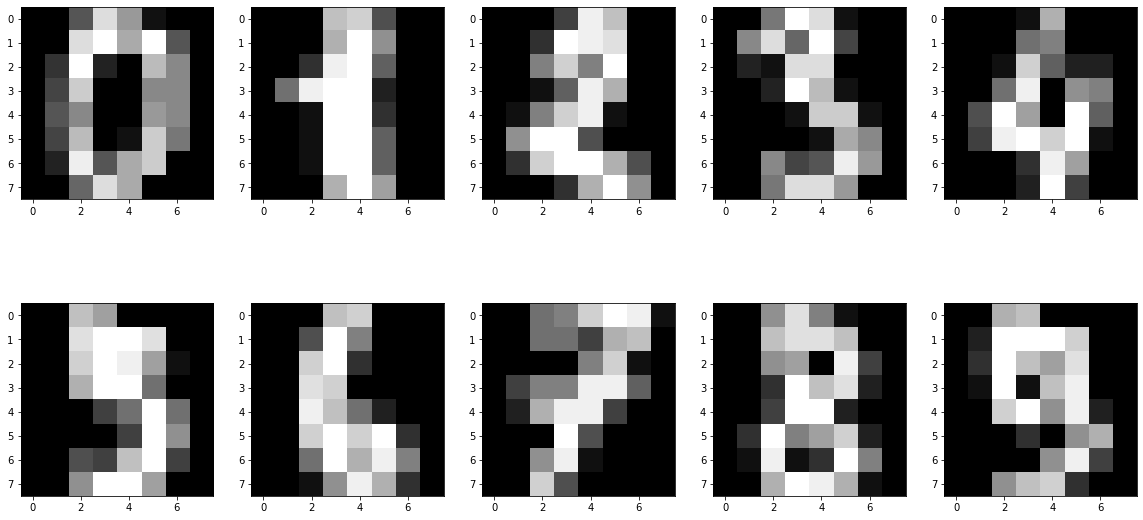

In [6]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [8]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [9]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 1257, 0.70
test_data size: 540, 0.30


In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [11]:
# 학습
random_forest.fit(train_data, train_target)

RandomForestClassifier()

In [12]:
# Feature importance
random_forest.feature_importances_

array([0.00000000e+00, 2.86476846e-03, 2.20262290e-02, 1.07202731e-02,
       1.02529687e-02, 1.94138907e-02, 8.18200569e-03, 5.52223559e-04,
       4.86855984e-05, 9.31125072e-03, 2.56503406e-02, 6.89928609e-03,
       1.60626789e-02, 2.73384846e-02, 5.98019686e-03, 3.97244449e-04,
       0.00000000e+00, 7.73430344e-03, 1.81398549e-02, 2.92864713e-02,
       3.07592438e-02, 4.53341968e-02, 9.46471688e-03, 2.29135369e-04,
       1.75014479e-05, 1.20732735e-02, 4.38330340e-02, 2.64423217e-02,
       3.11153019e-02, 2.49984570e-02, 2.74485316e-02, 6.11851427e-05,
       0.00000000e+00, 3.17716230e-02, 2.81586554e-02, 1.90358446e-02,
       3.55391450e-02, 1.89226747e-02, 2.45581387e-02, 0.00000000e+00,
       8.88253017e-05, 1.19646392e-02, 4.06565110e-02, 4.70246795e-02,
       1.97954876e-02, 2.00930041e-02, 1.61148445e-02, 9.30797448e-05,
       0.00000000e+00, 2.81342638e-03, 1.60415786e-02, 2.03505442e-02,
       1.46509022e-02, 2.15067473e-02, 2.46427971e-02, 1.52076453e-03,
      

In [13]:
feature_importance = pd.Series(random_forest.feature_importances_)

In [14]:
feature_importance.head(10)

0    0.000000
1    0.002865
2    0.022026
3    0.010720
4    0.010253
5    0.019414
6    0.008182
7    0.000552
8    0.000049
9    0.009311
dtype: float64

In [15]:
feature_importance = feature_importance.sort_values(ascending=False)

In [16]:
feature_importance.head(10)

43    0.047025
21    0.045334
26    0.043833
42    0.040657
36    0.035539
33    0.031772
61    0.031194
28    0.031115
20    0.030759
19    0.029286
dtype: float64

<AxesSubplot:>

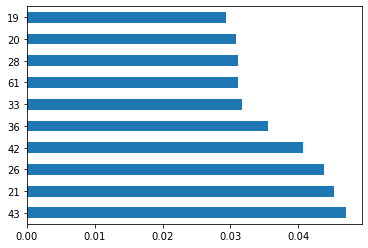

In [17]:
feature_importance.head(10).plot(kind="barh")

(-0.5, 7.5, 7.5, -0.5)

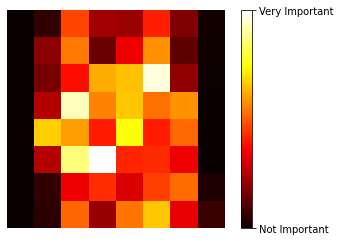

In [18]:
image = random_forest.feature_importances_.reshape(8, 8)

plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
cbar = plt.colorbar(ticks=[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])
plt.axis("off")
# 밝을수록 중요한 픽셀

In [19]:
# 예측
train_pred = random_forest.predict(train_data)
test_pred = random_forest.predict(test_data)

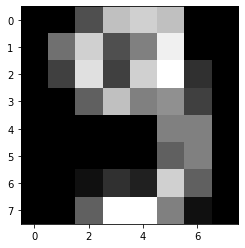

In [20]:
plt.imshow(train_data[4].reshape(8, 8), cmap="gray")

In [21]:
train_pred[4]

9

In [22]:
# 평가
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [23]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 1.0000
test accuracy is 0.9648


In [24]:
# Hyper Parameter tuning by Grid search
from sklearn.model_selection import GridSearchCV

In [25]:
# 탐색 범위 지정
params = {
    "n_estimators": [i for i in range(100, 1000, 200)],
    "max_depth": [i for i in range(10, 50, 10)],
}

In [26]:
params

{'n_estimators': [100, 300, 500, 700, 900], 'max_depth': [10, 20, 30, 40]}

In [27]:
# 탐색에 사용할 모델 생성
random_forest = RandomForestClassifier()

In [28]:
# 5*4*3 = 60개의 모델 탐색
grid = GridSearchCV(estimator=random_forest, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)

In [29]:
print(f"Best score of paramter search is: {grid.best_score_:.4f}")

Best score of paramter search is: 0.9722


In [30]:
# 최적의 Hyper Parameter 확인
grid.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [31]:
print("Best parameter of best score is")
print(f"\t max_depth: {grid.best_params_['max_depth']}")
print(f"\t n_estimators: {grid.best_params_['n_estimators']}")

Best parameter of best score is
	 max_depth: 20
	 n_estimators: 500


In [32]:
best_rf = grid.best_estimator_

In [33]:
best_rf

RandomForestClassifier(max_depth=20, n_estimators=500)

In [34]:
# 예측
train_pred = best_rf.predict(train_data)
test_pred = best_rf.predict(test_data)

In [35]:
# 평가
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)

In [36]:
print(f"Best parameter train accuracy is {best_train_acc:.4f}")
print(f"Best parameter test accuracy is {best_test_acc:.4f}")

Best parameter train accuracy is 1.0000
Best parameter test accuracy is 0.9722


In [37]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 1.0000
test accuracy is 0.9648


In [38]:
# Feature Importance
best_feature_importance = pd.Series(best_rf.feature_importances_)

In [39]:
best_feature_importance = best_feature_importance.sort_values(ascending=False)

In [40]:
best_feature_importance.head(10)

21    0.046178
43    0.044122
26    0.043758
36    0.038039
42    0.036462
28    0.032457
33    0.031358
20    0.029997
30    0.029790
13    0.027614
dtype: float64

<AxesSubplot:title={'center':'Best Parameter Feature Importance'}>

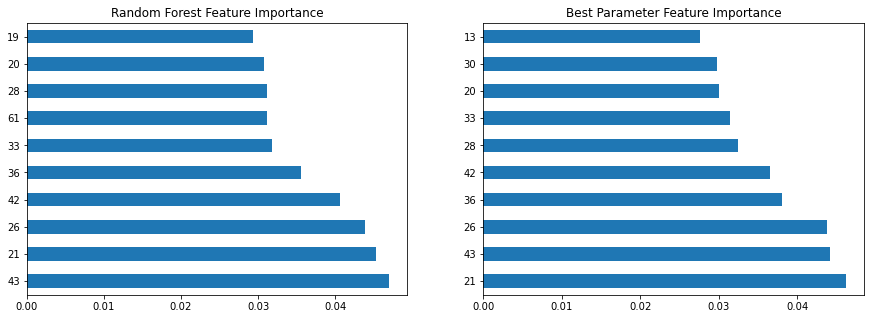

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
feature_importance.head(10).plot(kind="barh", ax=axes[0], title="Random Forest Feature Importance")
best_feature_importance.head(10).plot(kind="barh", ax=axes[1], title="Best Parameter Feature Importance")